In [620]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [621]:
# initialize
m = 5
w = 5

signals = [f"Signal_{i+1}" for i in range(m)]
timesteps = [f"Time_step_{i+1}" for i in range(w)]

base = np.arange(0.1, 0.75, (0.75-0.1)/m).reshape(1, m)[::-1].T[::-1].T*0.25
recon_loss = base + np.abs(np.random.randn(w, m))*0.75

# recon_loss = recon_loss.T[::-1].T

recon_loss = pd.DataFrame(recon_loss)
recon_loss.columns = signals
recon_loss.index = timesteps
recon_loss

,Signal_1,Signal_2,Signal_3,Signal_4,Signal_5
Time_step_1,0.300611,0.818013,0.212490,0.189436,1.131061
Time_step_2,1.529513,0.331300,0.176174,0.708305,1.160876
Time_step_3,1.244948,0.179391,0.708417,0.638084,0.504462
Time_step_4,0.478380,0.767872,0.432390,0.387885,0.121143
Time_step_5,0.847250,0.491546,1.316105,0.885330,0.500306


In [622]:
r_loss = np.abs(np.random.randn(1, m))*0.75 + base*0.25
r_loss = pd.DataFrame(r_loss, columns = signals)  

r_time = np.abs(np.random.randn(1, m))*0.75 + base*0.25
r_time = pd.DataFrame(r_time, columns = signals)
r_signal = pd.DataFrame(np.abs(np.random.randn(1, 1)))
r_loss, r_time, r_signal
r_signal

,0
0,2.060495


In [623]:
r_loss_mat = pd.DataFrame(r_loss.values.tolist()*w, columns = signals, index=timesteps)
r_time_mat = pd.DataFrame(r_time.values.tolist()*1, columns = signals)*w
r_time_mat

,Signal_1,Signal_2,Signal_3,Signal_4,Signal_5
0,1.112407,2.597785,3.828163,2.51534,3.355895


In [624]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import cm


# # setup the figure and axes
# fig = plt.figure(figsize=(7, 5))
# ax = fig.add_subplot(121, projection='3d')

# # Grid data...10

# x = np.arange(1,w+1,1)
# y = np.arange(1,m+1,1)
# # X, Y = np.meshgrid(x + 0.25, y - 0.10)
# X, Y = np.meshgrid(x, y)

# # Data for 3D plot
# top = recon_loss.T.values.flatten()

# # ---- others ---
# x_bar, y_bar = X.flatten(), Y.flatten()
# bottom = np.zeros_like(top)
# width = depth = 0.20

# # 3D Barplot
# colors = recon_loss.astype(str)
# red_pos = recon_loss.values > r_loss_mat.values
# green_pos = recon_loss.values <= r_loss_mat.values

# colors[green_pos] = 'green' 
# colors[red_pos] = 'blue' 
# colors = colors.T.values.flatten().tolist()

# # -------- done---------------------
# ax.bar3d(y_bar, x_bar, bottom, width, depth, top, shade=True, alpha = 0.85, color = colors) #, color = ['orange'', 'green']*50)
# ax.set_xlabel('Signals')
# ax.set_ylabel('Time Steps')
# #--------------------------------------


# x = np.arange(1,w+1,1)
# y = np.arange(1,m+1,1)
# # X, Y = np.meshgrid(x + 0.25, y + 0.50)
# X, Y = np.meshgrid(x, y)
# wrap = r_loss_mat.values
# # Surface plot
# surf = ax.plot_surface(Y, X, wrap.T, alpha=0.45,
#                        linewidth=1.50, antialiased=True)

# # ax.contour(Y, X, wrap.T, zdir='z', offset=0, cmap=cm.viridis)
# # ax.contour(Y, X, wrap.T, zdir='x', offset=-10, cmap='coolwarm')
# cs = ax.contour(Y, X, wrap.T, zdir='y', offset = 1, cmap=cm.Dark2)
# # plt.clabel(cs, inline=1, fontsize=10)

# # Contour plot
# # ax.contour(X, Y, Z, extend3d=True, cmap=cm.coolwarm)
# # proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
# #     for pc in cs.collections]

# # plt.legend()

# h1,l1 = cs.legend_elements()
# h1[0].set_color('gray')
# # h2,l1 = surf.legend_elements()
# plt.legend([h1[0]], ['$\mathcal{R}^{Loss}$'], bbox_to_anchor = (0.85, 0.85))


# ax.view_init(10, 255)

# plt.tight_layout()
# plt.savefig(f'plots/recon_loss_3d.jpg', dpi = 350)
# plt.show()

/Users/hshahriar/anaconda3/envs/tensorgpu/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: The following kwargs were not used by contour: 'marker'


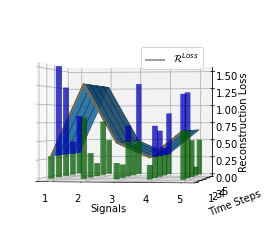

/Users/hshahriar/anaconda3/envs/tensorgpu/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


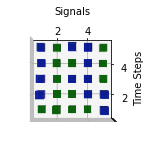

In [650]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


# setup the figure and axes---
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(121, projection='3d')

# Grid data...10
x = np.arange(1,m+1,1)
y = np.arange(1,w+1,1)
X, Y = np.meshgrid(x, y)
x_pos, y_pos = X.flatten(), Y.flatten()
z_pos = np.zeros_like(x_pos)
# ---- others ---

# Define size of the bars
side = 0.15
width = depth = side
total_bars = len(x_pos)

# Define data------------------------------
# Data for 3D plot
heights_total = recon_loss.values.flatten()
thresholds2d = r_loss_mat.values
thresholds = thresholds2d.flatten()
violation_index = np.where(heights_total > thresholds)[0]

# Split data/heights and colors in two parts
color1 = 'green'
color2 = 'blue'

colors = {}
colors[1] = np.array([color1]*total_bars)
colors[2] = colors[1].copy()
colors[2][violation_index] = color2

# Split data/heights and colors in two parts
heights = {}
heights[1] = heights_total
heights[2] = heights_total - thresholds
heights[1][violation_index] = thresholds[violation_index]
heights[2][heights[2] < 0] = 0


for i in range(1, 3):
# -------- done---------------------
    ax.bar3d(x_pos-side/2, y_pos - side/2, z_pos, width, depth, heights[i], shade=True, alpha = 0.50, color = colors[i]) #, color = ['orange'', 'green']*50)
    z_pos = heights[i]
    #--------------------------------------
ax.set_xlabel('Signals')
ax.set_ylabel('Time Steps')
ax.set_zlabel('Reconstruction Loss')
# ax.set_title("Index of loss violations")


# width = depth = 0.75
# ax.bar3d(x_pos, y_pos, wrap, 1, 1, 0.01, shade=True, alpha = 0.90) #, color = ['orange'', 'green']*50)

#-------------------------
# Surface plot
surf = ax.plot_surface(X, Y, thresholds2d, alpha=0.90,
                       linewidth=0.30, antialiased=True, rstride=1,cstride=1, edgecolors='k')
cs = ax.contour(X, Y, thresholds2d, zdir='y',marker = '*', offset = 1, cmap=cm.Dark2)
h1,l1 = cs.legend_elements()
h1[0].set_color('gray')
plt.legend([h1[0]], ['$\mathcal{R}^{Loss}$'], bbox_to_anchor = (0.85, 0.85))



# View of angle....
ax.view_init(0, 280)
#---------------------

# Saving image...
plt.tight_layout()
plt.savefig(f'plots/recon_loss_3d.jpg', dpi = 500)
plt.show()



# Adding second figure with top view........-----------------------------------------------------------
# setup the figure and axes---
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(121, projection='3d')

side = 0.50
width = depth = side

for i in range(1, 3):
# -------- done---------------------
    ax.bar3d(x_pos - side/2, y_pos- side/2, z_pos, width, depth, heights[i]
    , shade=True, alpha = 0.50, color = colors[i]) #, color = ['orange'', 'green']*50)
    z_pos = heights[i]
    #--------------------------------------
ax.set_xlabel('Signals')
ax.set_ylabel('Time Steps')
ax.zaxis.set_ticklabels([])
# plt.legend()
# ax.set_title("Index of loss violations")
# View of angle....
ax.view_init(90, 270)
#---------------------

# Saving image...
plt.tight_layout()
plt.savefig(f'plots/recon_loss_2d.jpg', dpi = 500)
plt.show()

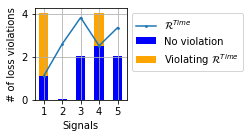

In [651]:
# Data for 3D plot
time_vio = pd.DataFrame((recon_loss > r_loss_mat).astype(int).sum()).T
# time_vio = pd.DataFrame((recon_loss > r_loss_mat).astype(int).sum()/w).T
heights_total = time_vio.values.flatten() + 0.05
thresholds = r_time_mat.values.flatten()

no_violation_index = np.where(heights_total == 0)[0]
violation_index = np.where(heights_total > thresholds)[0]

# Split data/heights and colors in two parts
# color0 = 'green'
color1 = 'blue'
color2 = 'orange'

colors = {}
colors[1] = pd.Series([color1]* m)
# colors[0] = colors[1].copy()
# colors[0].loc[no_violation_index] = color0
colors[2] = colors[1].copy()
colors[2].loc[violation_index] = color2

# colors[0] = colors[0].values
colors[1] = colors[1].values
colors[2] = colors[2].values

# Split data/heights and colors in two parts
heights = {}
# heights[0] = heights_total - heights_total
# heights[0][no_violation_index] = 0.05
heights[1] = heights_total
heights[2] = heights_total - thresholds
heights[1][violation_index] = thresholds[violation_index]
heights[2][heights[2] < 0] = 0


heights_df = pd.DataFrame(heights)
heights_df.columns = ['No violation', 'Violating $\mathcal{R}^{Time}$']
heights_df


# # Adding second figure with top view........-----------------------------------------------------------
# setup the figure and axes---
fig = plt.figure(figsize=(5, 2))
ax = fig.add_subplot(121)

# create stacked bar chart for monthly temperatures
heights_df.plot(kind='bar', stacked=True, color=['blue', 'orange'], ax = ax)
ax.plot(thresholds, marker = 'p', markersize = '2', label = '$\mathcal{R}^{Time}$')


# ax.xaxis.set_xticks(np.array(range(1, m+1)).tolist())
# ax.set_xticks([1, 2, 3, 4, 5])
# ax.set_xticklabels()
ax.set_xticklabels(np.array(range(1, m+1)).tolist(), rotation=0)

plt.grid(True)
# labels for x & y axis
plt.xlabel('Signals')
plt.ylabel('# of loss violations')
plt.legend(bbox_to_anchor = (1,1))
plt.tight_layout()
plt.savefig(f'plots/recon_time_bar.jpg', dpi = 500)
plt.show()


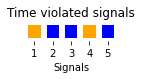

In [653]:
import matplotlib 
signal_vio = pd.DataFrame(colors[2] == 'orange')
signal_vio.index = signal_vio.index + 1
# sns.heatmap(signal_vio.T)
cmap = matplotlib.colors.ListedColormap(["blue","orange"], name='from_list', N=None)
fig = plt.figure(figsize=(3, 2))
ax = fig.add_subplot(121)
# ax.imshow(signal_vio.T, cmap= cmap)
sns.heatmap(signal_vio.T, square=True,  linewidths= 5, cmap= cmap, cbar = False)
ax.set_yticks([])
ax.set_title("Time violated signals")
# ax.set_xticks()
plt.xlabel('Signals')

plt.tight_layout()
plt.savefig(f'plots/recon_time_bin.jpg', dpi = 500)
plt.show()

In [655]:
r_signal_th = 1 #r_signal.values[0][0]
r_signal_df = pd.DataFrame([[1.0, r_signal_th]])
r_signal_df.columns = ['No violation', 'Violation']
# r_signal_df.columns = ['No violation', 'Violating $\mathcal{R}^{Signal}$']

# r_signal.index = ['Time step']
# r_signal[['No violation', 'Loss only']] = np.nan
r_signal_df = r_signal_df.T.sort_index().T
r_signal_df = r_signal_df.T
r_signal_df

,0
No violation,1.0
Violation,1.0


In [656]:
# signal_vio_count = pd.DataFrame(pd.Series(colors[2]).value_counts()/m)
signal_vio_count = pd.DataFrame(pd.Series(colors[2]).value_counts())
signal_vio_count = signal_vio_count.sort_index()
signal_vio_count.index = ['No violation', 'Violation']
signal_vio_count


,0
No violation,3
Violation,2


In [657]:
signal_vio = pd.DataFrame(signal_vio_count > r_signal_df).astype(int)
signal_vio


,0
No violation,1
Violation,1


In [658]:
heights_total = signal_vio_count.T
heights_total

,No violation,Violation
0,3,2


In [659]:
heights_total = signal_vio_count.T.copy()
thresholds = r_signal_df.T.copy()
violation_index = heights_total > thresholds
# Split data/heights and colors in two parts
heights = {}
# heights[0] = heights_total - heights_total
# heights[0][no_violation_index] = 0.05
heights[1] = heights_total.copy()
heights[2] = heights_total - thresholds
heights[1][violation_index] = thresholds[violation_index]
heights[2][heights[2] < 0] = 0
heights[1] = heights[1].values.flatten().tolist()
heights[2] = heights[2].values.flatten().tolist()
heights

{1: [1, 1], 2: [2.0, 1.0]}

In [660]:
heights_total
# thresholds
#violation_index = np.where(heights_total > thresholds)[0]
#violation_index

,No violation,Violation
0,3,2


In [661]:
violation_index = np.where(heights_total.values.flatten() > thresholds.values.flatten())[0]

# Split data/heights and colors in two parts
# color0 = 'green'
color1 = 'blue'
color2 = 'orange'
color3 = 'red'

colors = {}
colors[1] = pd.Series([color1, color2])
# colors[0] = colors[1].copy()
# colors[0].loc[no_violation_index] = color0
colors[2] = colors[1].copy()
colors[2].loc[violation_index] = color3

# colors[0] = colors[0].values
colors[1] = colors[1].values
colors[2] = colors[2].values
colors

{1: array(['blue', 'orange'], dtype=object),
 2: array(['red', 'red'], dtype=object)}

In [662]:
heights

{1: [1, 1], 2: [2.0, 1.0]}

In [663]:

heights_df = pd.DataFrame(heights)
heights_df.index = ['No violation', 'Violation']
heights_df = heights_df.T
heights_df



,No violation,Violation
1,1.0,1.0
2,2.0,1.0


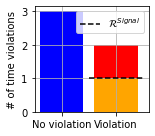

In [669]:
colors ={}
colors[1] = ['blue', 'orange']
colors[2] = ['blue', 'red']
colors


fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot(121)

x = heights_df.columns.tolist()
bottom = 0
for i in range(1, 3):
    # data---
    data = heights_df.loc[i].values
    ax.bar(x, bottom = bottom, height = data, color = colors[i]) #, label = ['blue', 'orange'])
    bottom = data 

ax.plot([0.5, 1.5], [r_signal_th, r_signal_th], "k--", label= '$\mathcal{R}^{Signal}$')

plt.grid(True)
plt.legend()
plt.ylabel('# of time violations')
plt.tight_layout()
plt.savefig(f'plots/signal_vio.jpg', dpi = 500)
plt.show()